In [1]:
import pandas as pd
#Load the dataset
file_path = 'Delayedflight.csv'
df = pd.read_csv('Delayedflight.csv')
print("Dataset loaded successfully!")
print(f"shape:{df.shape}")

Dataset loaded successfully!
shape:(1048575, 30)


In [3]:
# Step 2: Basic exploration
import pandas as pd
df = pd.read_csv('Delayedflight.csv')
print("\nFirst 10 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print(f"\nShape: {df.shape}")

print("\nStatistical Summary:")
print(df.describe())


First 10 rows:
   S No  Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0     0  2008      1           3          4     2003        1955   2211.0   
1     1  2008      1           3          4      754         735   1002.0   
2     2  2008      1           3          4      628         620    804.0   
3     4  2008      1           3          4     1829        1755   1959.0   
4     5  2008      1           3          4     1940        1915   2121.0   

   CRSArrTime UniqueCarrier  ...  TaxiIn TaxiOut  Cancelled  CancellationCode  \
0        2225            WN  ...     4.0       8          0                 N   
1        1000            WN  ...     5.0      10          0                 N   
2         750            WN  ...     3.0      17          0                 N   
3        1925            WN  ...     3.0      10          0                 N   
4        2110            WN  ...     4.0      10          0                 N   

   Diverted  CarrierDelay  Weather

In [3]:
# Step 3: Missing values and duplicates
print("\nMissing Values:")
missing = df.isnull().sum()
print(missing[missing > 0].sort_values(ascending=False))

print(f"\nTotal duplicate rows: {df.duplicated().sum()}")


Missing Values:
CarrierDelay         362841
WeatherDelay         362841
NASDelay             362841
SecurityDelay        362841
LateAircraftDelay    362841
ArrTime                3896
ActualElapsedTime      3896
AirTime                3896
ArrDelay               3896
TaxiIn                 3896
CRSElapsedTime          157
TailNum                   4
dtype: int64

Total duplicate rows: 0


In [4]:
# Key variables (adjust column names if needed)
key_cols = ['Year', 'FlightNum', 'Origin','DepDelay', 'ArrDelay', 'Cancelled', 'CancellationCode' ,'CarrierDelay','WeatherDelay',
           'NASDelay','SecurityDelay','LateAircraftDelay']
print("\nKey Columns Sample:")
print(df[key_cols].head())


Key Columns Sample:
   Year  FlightNum Origin  DepDelay  ArrDelay  Cancelled CancellationCode  \
0  2008        335    IAD         8     -14.0          0                N   
1  2008       3231    IAD        19       2.0          0                N   
2  2008        448    IND         8      14.0          0                N   
3  2008       3920    IND        34      34.0          0                N   
4  2008        378    IND        25      11.0          0                N   

   CarrierDelay  WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay  
0           NaN           NaN       NaN            NaN                NaN  
1           NaN           NaN       NaN            NaN                NaN  
2           NaN           NaN       NaN            NaN                NaN  
3           2.0           0.0       0.0            0.0               32.0  
4           NaN           NaN       NaN            NaN                NaN  


In [9]:
# Step 5: Remove duplicate rows
initial_rows = len(df)
df.drop_duplicates(inplace=True)
print(f"Removed {initial_rows - len(df)} duplicate rows.")

Removed 0 duplicate rows.


In [13]:
# Step 6: Handle missing values

# Fill delay columns with 0 (not delayed)
delay_cols = ['DepDelay', 'ArrDelay', 'CarrierDelay', 'WeatherDelay', 
              'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
df[delay_cols] = df[delay_cols].fillna(0)

# Fill cancellation code with 'None' for missing values
df['CancellationCode'] = df['CancellationCode'].fillna('None')

# Print summary
print("Missing values handled.")
print("Remaining missing values:", df.isnull().sum().sum())

Missing values handled.
Remaining missing values: 15745


In [14]:
# Step 7: Convert FL_DATE to datetime
df['Year'] = pd.to_datetime(df['Year'], errors='coerce')
print(" Year converted to datetime.")
print(df['Year'].dtype)

 Year converted to datetime.
datetime64[ns]


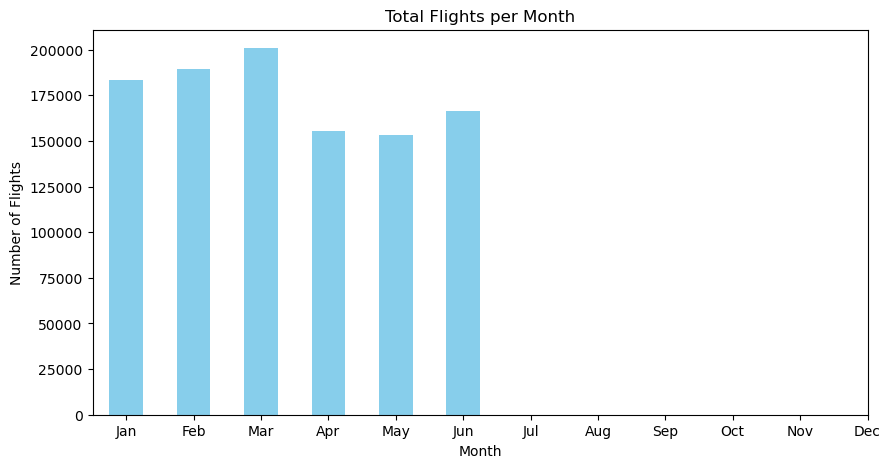

In [15]:
# Step 9: Univariate - Flights per Month
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
monthly_flights = df['Month'].value_counts().sort_index()
monthly_flights.plot(kind='bar', color='skyblue')
plt.title('Total Flights per Month')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.xticks(range(0,12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=0)
plt.show()

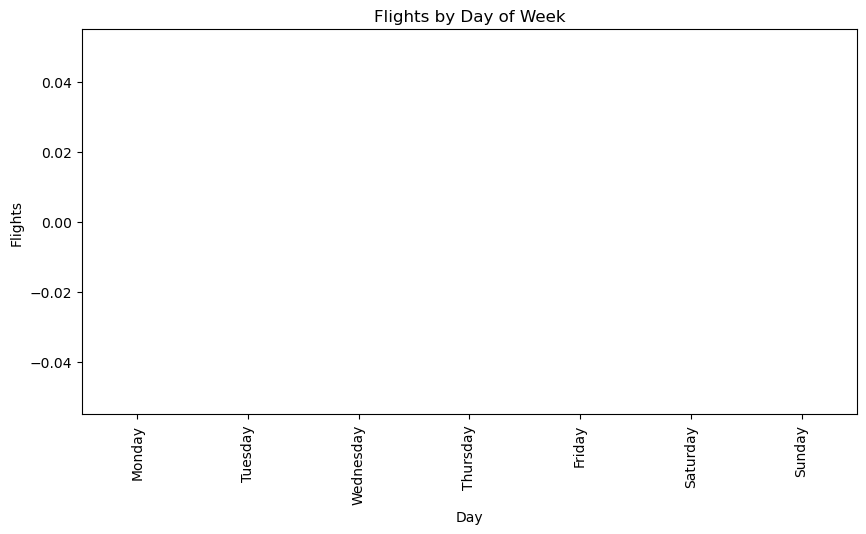

In [16]:
# Step 10: Flights by Day of Week
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
daily_flights = df['DayOfWeek'].value_counts().reindex(day_order)

plt.figure(figsize=(10,5))
daily_flights.plot(kind='bar', color='salmon')
plt.title('Flights by Day of Week')
plt.xlabel('Day')
plt.ylabel('Flights')
plt.show()

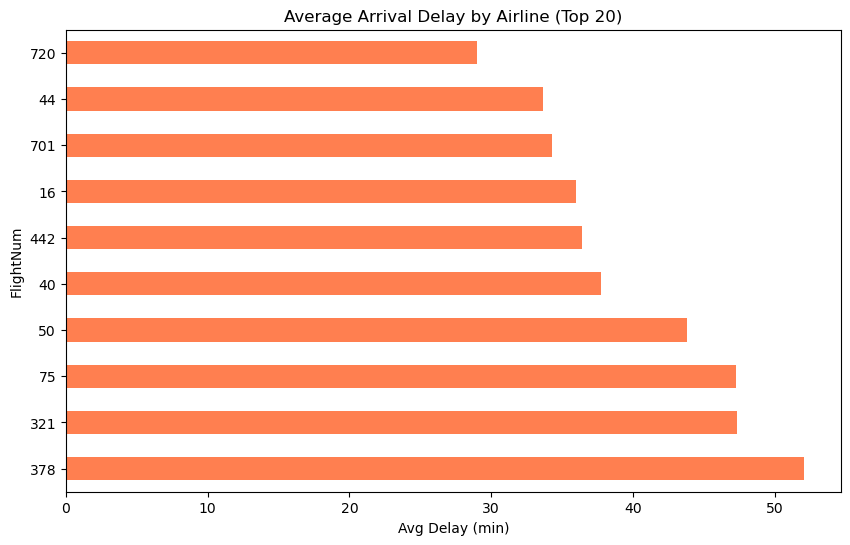

In [17]:
# Step 11: Bivariate - Avg Arrival Delay by Airline
top_airlines = df['FlightNum'].value_counts().head(10).index
delay_by_airline = df[df['FlightNum'].isin(top_airlines)].groupby('FlightNum')['ArrDelay'].mean()

plt.figure(figsize=(10,6))
delay_by_airline.sort_values(ascending=False).plot(kind='barh', color='coral')
plt.title('Average Arrival Delay by Airline (Top 20)')
plt.xlabel('Avg Delay (min)')
plt.show()

In [18]:
# IQR for Arrival Delay
Q1 = df['ArrDelay'].quantile(0.25)
Q3 = df['ArrDelay'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Flag outliers
df['Is_ArrDelay_Outlier_IQR'] = df['ArrDelay'].apply(
    lambda x: 'Outlier' if x < lower_bound or x > upper_bound else 'Normal'
)

outlier_count = df['Is_ArrDelay_Outlier_IQR'].value_counts()
print("IQR Outlier Summary (Arrival Delay):")
print(outlier_count)
print(f"\nOutlier Threshold: < {lower_bound:.1f} or > {upper_bound:.1f} min")

IQR Outlier Summary (Arrival Delay):
Normal     975903
Outlier     72672
Name: Is_ArrDelay_Outlier_IQR, dtype: int64

Outlier Threshold: < -61.5 or > 126.5 min


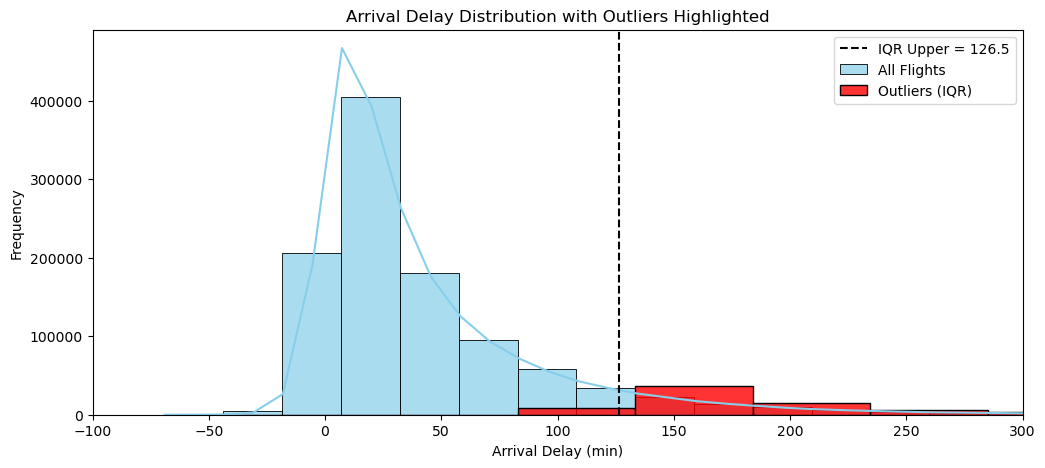

In [19]:
plt.figure(figsize=(12, 5))
sns.histplot(df['ArrDelay'], bins=100, kde=True, color='skyblue', alpha=0.7, label='All Flights')
sns.histplot(df[df['Is_ArrDelay_Outlier_IQR'] == 'Outlier']['ArrDelay'], 
             bins=50, color='red', alpha=0.8, label='Outliers (IQR)')
plt.xlim(-100, 300)
plt.title('Arrival Delay Distribution with Outliers Highlighted')
plt.xlabel('Arrival Delay (min)')
plt.ylabel('Frequency')
plt.legend()
plt.axvline(upper_bound, color='black', linestyle='--', label=f'IQR Upper = {upper_bound:.1f}')
plt.legend()
plt.show()

In [20]:
# Remove duplicates
initial_rows = df.shape[0]
df = df.drop_duplicates()
removed = initial_rows - df.shape[0]
print(f"Removed {removed} duplicate rows. New shape: {df.shape}")

Removed 0 duplicate rows. New shape: (1048575, 31)


In [21]:
# Identify missing
print("\nMissing Values Before:")
print(df.isnull().sum()[df.isnull().sum() > 0])

# Handle nulls in delay columns (fill with 0 - no delay)
delay_cols = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'ArrDelay', 'DepDelay', 'AirTime', 'ActualElapsedTime', 'TaxiIn', 'TaxiOut']
df[delay_cols] = df[delay_cols].fillna(0)

# Fill CancellationCode with 'N' (not cancelled, as per dataset convention)
df['CancellationCode'] = df['CancellationCode'].fillna('N')

# Drop rows with critical missing (e.g., TailNum, if any - but rare)
df = df.dropna(subset=['TailNum', 'Origin', 'Dest'])

# Drop unnamed column if present
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)

print("\nMissing Values After:")
print(df.isnull().sum()[df.isnull().sum() > 0])


Missing Values Before:
ArrTime              3896
TailNum                 4
ActualElapsedTime    3896
CRSElapsedTime        157
AirTime              3896
TaxiIn               3896
dtype: int64

Missing Values After:
ArrTime           3895
CRSElapsedTime     157
dtype: int64


In [22]:
# Clip negative delays to 0
df[delay_cols] = df[delay_cols].clip(lower=0)

print("Negative delays clipped to 0.")
print(df['ArrDelay'].describe())

Negative delays clipped to 0.
count    1.048571e+06
mean     4.261608e+01
std      5.521510e+01
min      0.000000e+00
25%      9.000000e+00
50%      2.500000e+01
75%      5.600000e+01
max      2.461000e+03
Name: ArrDelay, dtype: float64


In [23]:
# Remove diverted flights
df = df[df['Diverted'] == 0]

# Remove extreme delays (>24 hours)
extreme = df['ArrDelay'] > 1440
print(f"Removing {extreme.sum()} flights with delay > 24 hrs")
df = df[~extreme]

print(f"Final shape: {df.shape}")

Removing 7 flights with delay > 24 hrs
Final shape: (1044669, 31)


In [29]:
monthly = df.groupby(['Year', 'Month']).agg(
    TotalFlights=('Year', 'count'),
    AvgDelay=('ArrDelay', 'mean'),
    DelayRate=('DepDelay', 'mean'),
    Cancelled=('Cancelled', 'sum')
).round(2).reset_index()

monthly['DelayRate'] = (monthly['DelayRate'] * 100).round(1)

print("Monthly Summary:")
print(monthly.head())

Monthly Summary:
                           Year  Month  TotalFlights  AvgDelay  DelayRate  \
0 1970-01-01 00:00:00.000002008      1        182914     43.45     4347.0   
1 1970-01-01 00:00:00.000002008      2        188624     45.54     4486.0   
2 1970-01-01 00:00:00.000002008      3        200114     42.52     4279.0   
3 1970-01-01 00:00:00.000002008      4        154781     39.47     3977.0   
4 1970-01-01 00:00:00.000002008      5        152708     38.25     3899.0   

   Cancelled  
0          0  
1          0  
2          0  
3          0  
4          0  


In [30]:
df .to_csv('cleaned_Delayedflight.csv', index=False)
print("Saved: cleaned_Delayedflight.csv")

Saved: cleaned_Delayedflight.csv
